In [25]:
import pandas as pd
import numpy as np

## Read the dataset

- Using `pd.read_csv` for reading the tabular data from csv files.
- The methods returns a pandas `DataFrame` object, that can be explored in an interactive manner. For more details [follow](https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.DataFrame.html?highlight=dataframe#)
- `read_csv` function returns an iterable object when provided with `chunksize: int` or `iterable: True`.
- Using `next` functionality we can iterate through the object to get data wit `chunksize`

In [26]:
df = pd.read_csv("../train.csv", header=0, index_col=0)
df.head(10)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,target
id,,,,,,,,,,,,,,,,,,,,,
0,0.106643,3.594370,132.80400,3.18428,0.081971,1.188590,3.732380,2.266270,2.099590,0.012330,...,1.09862,0.013331,-0.011715,0.052759,0.065400,4.211250,1.97877,0.085974,0.240496,0
1,0.125021,1.673360,76.53360,3.37825,0.099400,5.093660,1.275620,-0.471318,4.545940,0.037706,...,3.46017,0.017054,0.124863,0.154064,0.606848,-0.267928,2.57786,-0.020877,0.024719,0
2,0.036330,1.497470,233.54600,2.19435,0.026914,3.126940,5.056870,3.849460,1.801870,0.056995,...,4.88300,0.085222,0.032396,0.116092,-0.001688,-0.520069,2.14112,0.124464,0.148209,0
3,-0.014077,0.246000,779.96700,1.89064,0.006948,1.531120,2.698000,4.517330,4.503320,0.123494,...,3.47439,-0.017103,-0.008100,0.062013,0.041193,0.511657,1.96860,0.040017,0.044873,0
4,-0.003259,3.715420,156.12800,2.14772,0.018284,2.098590,4.154920,-0.038236,3.371450,0.034166,...,1.91059,-0.042943,0.105616,0.125072,0.037509,1.043790,1.07481,-0.012819,0.072798,1
5,0.026798,0.801415,136.59800,2.35950,0.046621,2.949720,3.501930,0.694882,1.848460,0.097730,...,4.01126,0.101817,0.058697,0.024684,0.102794,0.262006,1.30932,0.159111,0.111462,1
6,0.940176,4.301660,835.78500,4.65820,-0.012422,2.728400,1.896610,0.501663,1.822280,0.036901,...,1.36614,0.069577,0.045734,0.034431,0.403175,1.817350,3.72522,0.028623,0.450104,1
7,0.496696,3.502990,9.41337,2.30188,-0.001476,1.004410,4.955720,1.496060,2.499600,0.066127,...,4.27551,0.021567,0.020843,0.111757,0.061681,3.601000,5.27379,0.014103,1.671650,1
8,-0.007282,3.957490,124.70400,2.24207,0.022056,0.250706,1.454410,-0.338266,0.710145,0.096573,...,3.66111,-0.050546,0.040697,0.088473,0.630877,1.446970,3.75430,0.097077,0.168881,0


## Huge chunk of features let's analyse which feature contains more rational information about data

### Applying Principal Component Analysis(PCA)

- PCA is applied to analyse that how much of information about data is contained in a certain feature
- Basically PCA is Eigen Value Decomposition (eigen value for each feature defines the variance contained by that feature)
- Sometimes EVD is replaced with Singular Value Decomposition (SVD). In this the Singular values acts similar to eigen values.

In [27]:
# Get the feature and target columns
feature_cols = df.columns[:-1]
target_cols = df.columns[-1]

# Get the data as a numpy matrix
features = df[feature_cols].to_numpy()
target = df[target_cols].to_numpy()
print(f"Data shape: features -> {features.shape}, and Target -> {target.shape}") 

Data shape: features -> (600000, 100), and Target -> (600000,)


### Normalize the features

- Normalization is something that is needed by PCA.
- PCA is suceptible to variance in feature observations.
- If some features have significantly different scales, then the features with lower scale can get supressed while decomposition.
- We need to transform each feature to have standard deviation 1 unit, and mean to 0 unit.

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
# Create the StandardScaler object
scaler = StandardScaler()

# Transform the features
features = scaler.fit_transform(features)

In [30]:
# Check if it worked or not
features_mean = np.mean(features, axis=0)
features_std = np.std(features, axis=0)

print(f"Feature mean: {features_mean} \n Features standard deviation: {features_std}")

Feature mean: [-2.48689958e-16  5.49865338e-16 -1.84859535e-16 -1.23160741e-17
 -2.02457310e-16 -6.55783576e-16  5.02022128e-16 -3.01554337e-16
  4.17799129e-16  1.21644916e-16 -6.19403788e-16 -2.65458766e-16
  1.90709670e-16  7.53157536e-16 -1.86020088e-16 -1.77825162e-16
  2.29742151e-17 -2.14489167e-16  3.47786984e-16  2.88006656e-17
 -1.02140518e-16  7.04384699e-17 -3.34884713e-16  8.78230821e-17
  8.14755670e-17  5.02590562e-16  3.78956126e-18  2.07289001e-16
 -1.59789219e-16  6.42804328e-16  7.65017679e-17 -1.00897068e-16
  8.46493246e-17 -4.45273448e-17 -1.98951966e-17 -1.72661885e-17
 -6.53225622e-17  7.97892123e-16 -1.54519360e-16 -5.05906428e-17
 -4.41625995e-16  3.64887380e-16  3.09796633e-17  9.05610401e-16
  1.34813642e-16 -6.16751095e-16 -5.18459350e-17 -1.29366147e-16
 -1.09778853e-16 -5.21064673e-18  1.02424735e-16  2.00846747e-17
 -5.21064673e-19 -3.19306063e-16 -2.00467791e-16  8.43366858e-16
 -5.64111720e-17 -4.04914620e-16  3.86061553e-18 -1.62062956e-17
 -1.1586583

### Apply EVD

In [33]:
# Get the covariance matrix
features_cov = np.cov(features.T)

# Apply eigen value decomposition
eigen_vals, eigen_vecs = np.linalg.eig(features_cov)

# normalize the eigen values to compare in %
eigen_vals /= np.sum(eigen_vals)
eigen_vals *= 100

### Visualize the eigen values

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

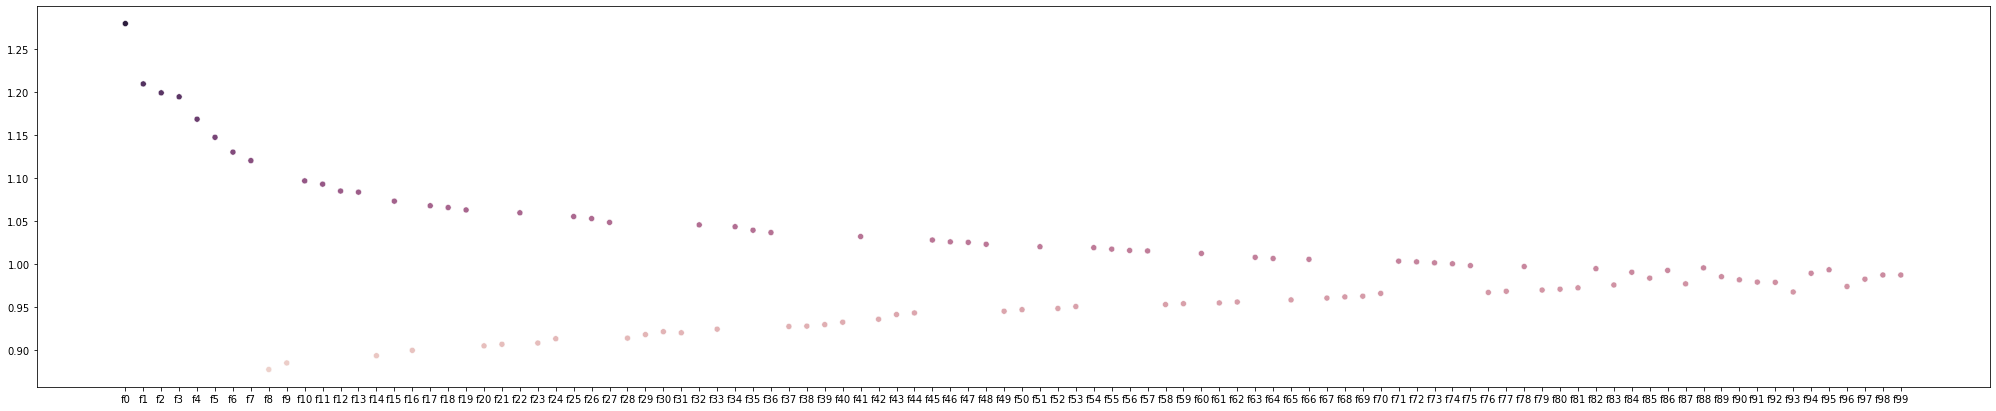

In [35]:
plt.figure(figsize = [35, 7])
ep = sns.scatterplot(x = feature_cols, y = eigen_vals, hue = np.log(eigen_vals), legend = False)

#### Sort eigen values and features for clear visualization

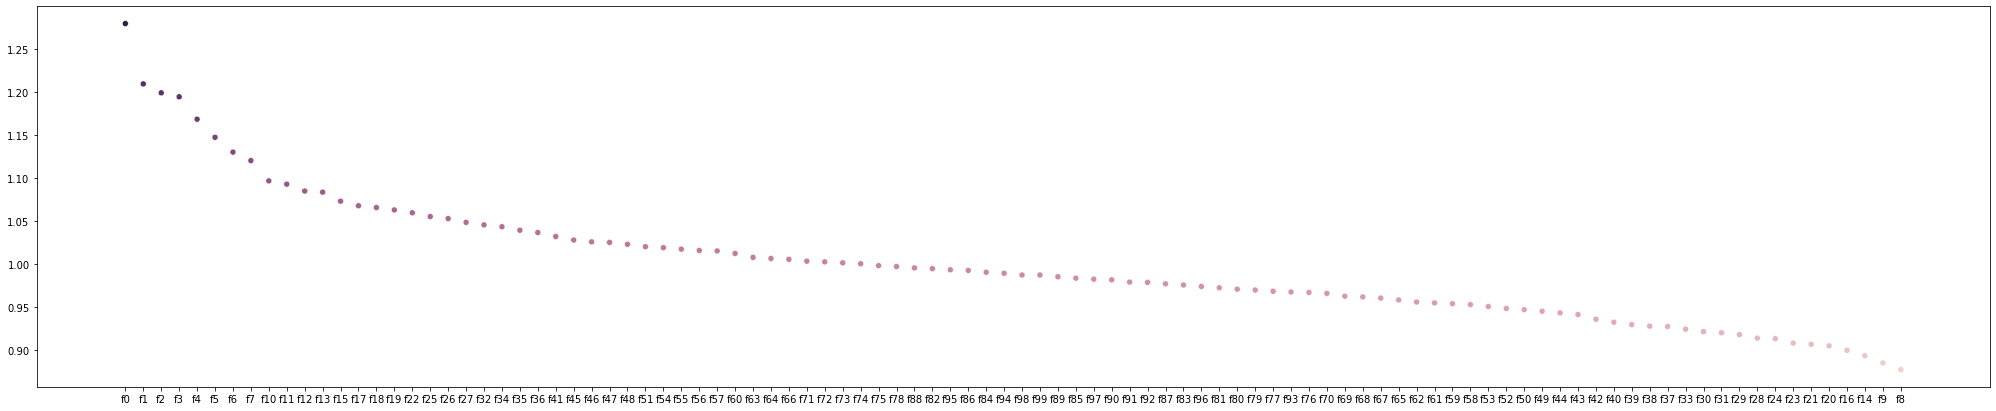

In [36]:
# Get the sort indexs
idx = np.flip(np.argsort(eigen_vals))

# plot the sorted eigen values and corresponsing features
plt.figure(figsize = [35, 7])
ep = sns.scatterplot(x = feature_cols[idx], y = eigen_vals[idx], hue = np.log(eigen_vals[idx]), legend = False)

#### Lets look at the cumulative behaviour of eigen values for each feature

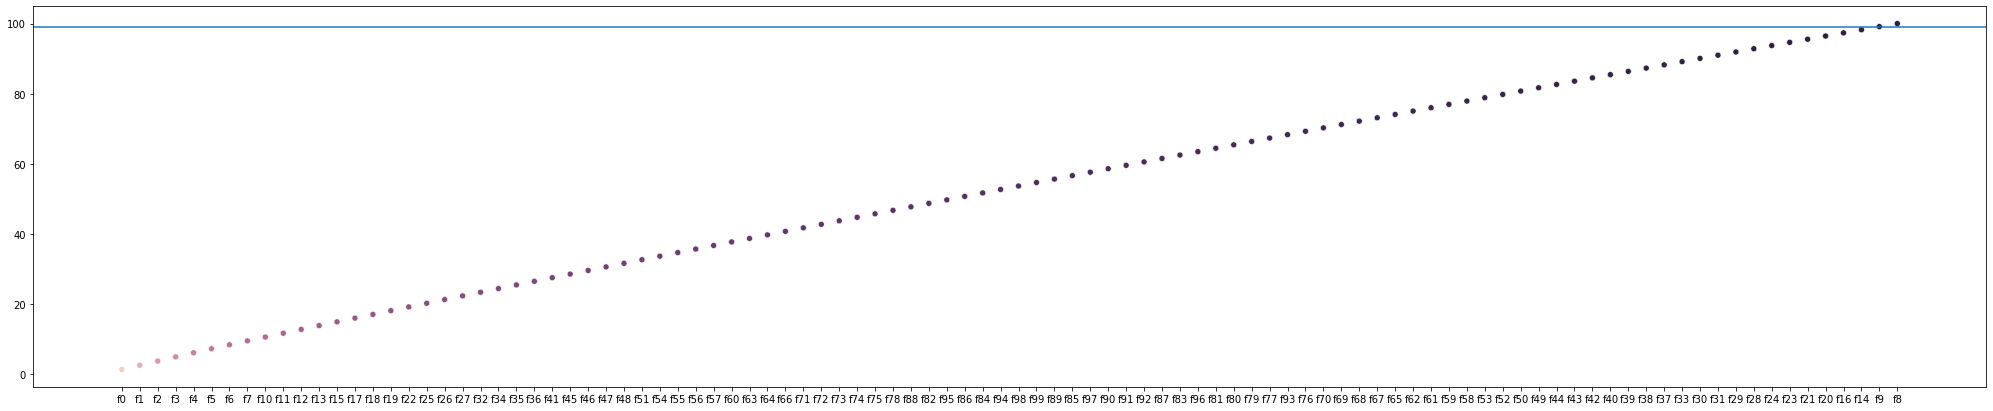

In [40]:
eigen_vals_cumulative = np.cumsum(eigen_vals[idx])
plt.figure(figsize = [35, 7])
graph = sns.scatterplot(x = feature_cols[idx], y = eigen_vals_cumulative, hue = np.log(eigen_vals_cumulative), legend = False)
graph.axhline(99)
plt.show()

> We can easily observe in the previous figure that the change in cumulative behaviour of eigen values is gradual through out the feature space(simply, the 99% data retention is only on the cost of a single feature). Thus the PCA based feature selection won't be useful and if applied will create problem of data loss, without significant advantage on feature dismissal.